✅ Accuracy: 0.9561

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

🧾 Confusion Matrix:
 [[39  4]
 [ 1 70]]


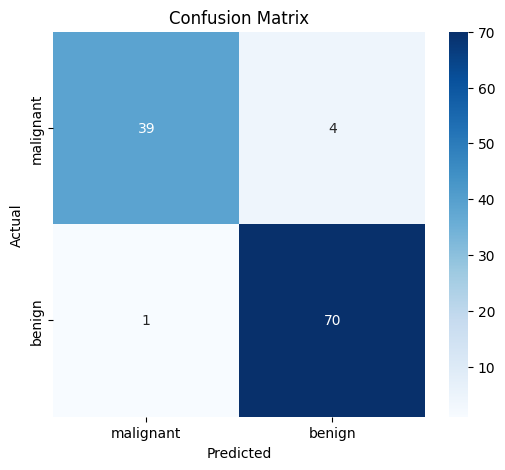

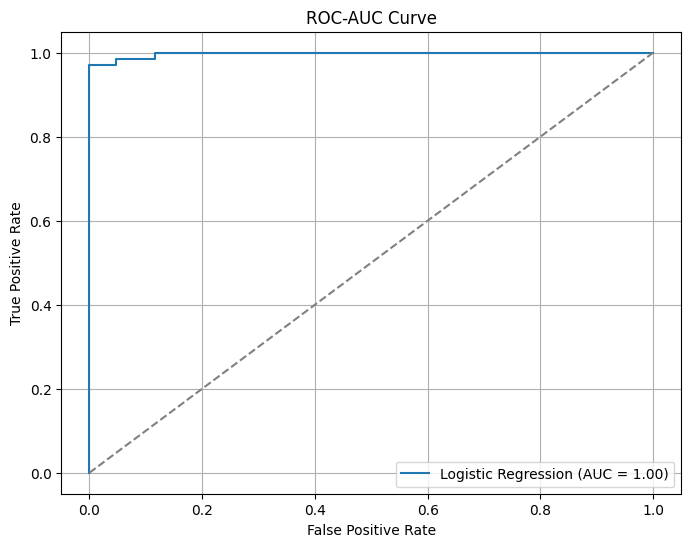

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# 5. Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# --- Results ---
print(f"✅ Accuracy: {acc:.4f}\n")
print("📊 Classification Report:\n", report)
print("🧾 Confusion Matrix:\n", conf_mat)

# 6. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# 7. ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


🔍 Accuracy: 0.956140350877193

📊 Confusion Matrix:
[[39  4]
 [ 1 70]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

📈 ROC-AUC Score: 0.9977071732721913


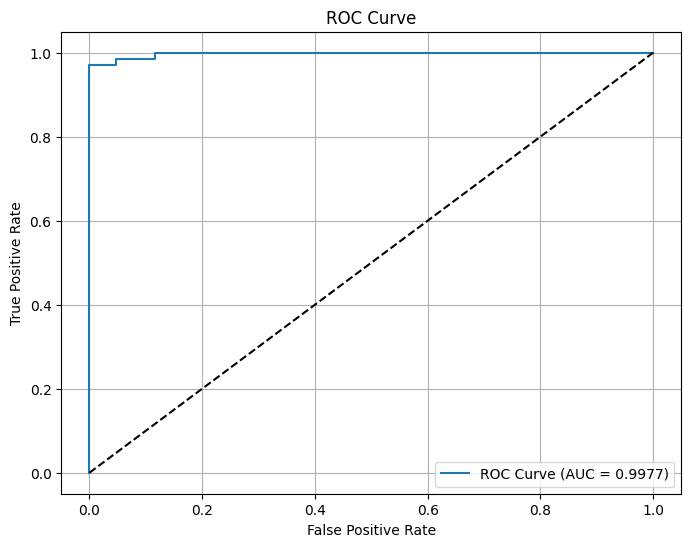

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)

# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of positive class

# 5. Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("📈 ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# 6. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression model (multiclass with softmax)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


✅ Accuracy: 1.0

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1. What are the assumptions of linear regression?
Linear regression assumes:

Linearity: The relationship between independent and dependent variables is linear.

Independence: Observations are independent of each other.

Homoscedasticity: Constant variance of errors.

Normality of residuals: Errors (residuals) are normally distributed.

No multicollinearity: Independent variables should not be highly correlated with each other.

2. When should you use logistic regression instead of linear regression?
Use logistic regression when the target variable is categorical, especially binary (e.g., yes/no, 0/1). Unlike linear regression, logistic regression is designed to predict probabilities and map output between 0 and 1 using the sigmoid function, making it ideal for classification tasks.

3. What is the interpretation of coefficients in logistic regression?
In logistic regression, each coefficient represents the log odds change in the target variable for a one-unit increase in the corresponding feature, holding others constant. If you exponentiate the coefficient (exp(coef)), it gives you the odds ratio, which shows how the odds of the positive class change.

4. What is the difference between sigmoid and softmax functions?
The sigmoid function maps a real-valued input to a probability between 0 and 1 and is used in binary classification. The softmax function generalizes sigmoid for multiclass classification, outputting a probability distribution over multiple classes that sums to 1.


5. Why is R-squared not suitable for evaluating logistic regression models?
R-squared measures the proportion of variance explained in linear regression, which deals with continuous outputs. Logistic regression predicts probabilities for categorical outcomes, so metrics like accuracy, precision, recall, F1-score, and ROC-AUC are more appropriate for evaluation.

